# Lecture 11a. Naive Bayes Classification

[Naive Bayes User Guide](https://scikit-learn.org/stable/modules/naive_bayes.html)

[Gaussian Naive Bayes implementation](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)

## Dataset: iris flowers,
Load from seaborn, or from scikit-learn   

**Summary about the algo:**    
Naive Bayes is an "supervised learning" model.   
We know the labels. We have a "y" target variable. 

Goal:  
Classify observations in known categories.

Important note:   
Assumption of "conditional independence" between every pair of features.  
This means that the value of any feature is not correlated with any other feature.   
Can you think of examples that this applies?

# A. Import the necessary modules.   
Imports should be at the first code cell.

In [27]:
# data management libraries
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True, precision=3)

# visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
# scikit learn algo library (google it)
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB, MultinomialNB
# data preprocessing 
from sklearn.model_selection import train_test_split
# algo metric
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# B. Load the data and understand its features.   
See which are the variables, what is their type, what are the values that the variables take.  
At this step, you should think about possible relations that you ought to examine.   
Which do you think might be more important?

In [2]:
# load iris from scikit-learn
# iris = datasets.load_iris(as_frame=True)
# df = pd.DataFrame(iris.frame)

# df.columns  # I don't like the headers for the features, but I like the "target" name for y.

In [3]:
# load iris from seaborn, which loads training datasets and returns a pandas dataframe
df = sns.load_dataset('iris')

In [4]:
df.columns  # i don't like the "species" header. I prefer the "target"

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
X = df.iloc[:,:-1]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
# use .loc to get all columns names,  the "~" operator is a negation, it excludes.
X = df.loc[:, ~df.columns.isin(['species'])]

In [8]:
X.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [9]:
y = df["species"]
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

## Data Preprocessing

In [10]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [12]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
# train_test_split?

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)#, test_size=0.5, random_state=0)

In [15]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [16]:
len(y_test)

38

In [17]:
len(X_test)

38

## Apply Naive Bayes on Iris dataset

In [18]:
clf = GaussianNB()

In [19]:
clf

GaussianNB()

In [20]:
fit_clf = clf.fit(X_train, y_train)

In [21]:
clf

GaussianNB()

In [22]:
y_pred = fit_clf.predict(X_test)

In [23]:
y_pred

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'versicolor'], dtype='<U10')

In [24]:
print(f"{(y_test != y_pred).sum()} mislabeled points out of a total {len(X_test)}  observations.")

0 mislabeled points out of a total 38  observations.


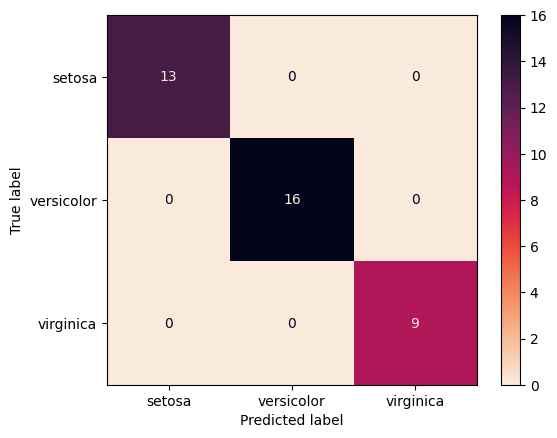

In [28]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

# Get available colormap options for matplotlib
# plt.colormaps()

ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=clf.classes_
).plot(
    # cmap="inferno_r"
    cmap='rocket_r'
);

In [29]:
# accuracy_score??

In [30]:
# fit_clf.score?

In [31]:
fit_clf.score(X_train, y_train)

0.9464285714285714

In [32]:
y_pred_training = fit_clf.predict(X_train)
# y_pred_training

In [33]:
fit_clf.score(X_test, y_test)

1.0

In [34]:
fit_clf.predict_proba(X_test)

array([[0.   , 0.   , 1.   ],
       [0.   , 1.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.781, 0.219],
       [0.   , 0.91 , 0.09 ],
       [0.   , 1.   , 0.   ],
       [0.   , 0.46 , 0.54 ],
       [0.   , 0.946, 0.054],
       [0.   , 0.999, 0.001],
       [0.   , 0.95 , 0.05 ],
       [0.   , 0.988, 0.012],
       [1.   , 0.   , 0.   ],
       [0.   , 0.988, 0.012],
       [0.   , 1.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.012, 0.988],
       [0.   , 0.992, 0.008],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.161, 0.839],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.999, 0.001],
       [0.   , 1.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.001, 0.999],
       [0.   , 0.994, 0.006],
       [1.   , 0.   , 0.   ],
       [0.

In [35]:
accuracy_score(y_train, y_pred_training)

0.9464285714285714

In [36]:
accuracy_score(y_test, y_pred)

1.0

In [37]:
len(X_train)

112

In [38]:
fit_clf.score(X_train, y_train)

0.9464285714285714

In [39]:
fit_clf.score(X_test, y_test)

1.0

In [40]:
accuracy_score(y_test, y_pred)

1.0

### predict a new observation

In [41]:
print(fit_clf.predict([[5.1, 3.5, 1.4, 1.2]]))  # mind the two [[]] 

['versicolor']


/home/tharg/venv_projects/uoa_py_course/course_venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


### use Multinomial NB

In [42]:
y_pred = MultinomialNB().fit(X_train, y_train).predict(X_test)

In [43]:
# accuracy_score?

In [44]:
accuracy_score(y_test, y_pred)

0.5789473684210527

## Digits dataset

### This is the class about naive bayes implementation. ONLY THIS

In [45]:
X, y = datasets.load_digits(as_frame=True, return_X_y=True)

In [51]:
wine = datasets.load_wine(as_frame=True)
X = wine.data
y = wine.target

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [53]:
y_pred = GaussianNB().fit(X_train, y_train).predict(X_test)

In [54]:
accuracy_score(y_test, y_pred)

0.9333333333333333